__РАСПОЗНАВАНИЕ РУКОПИСНЫХ ЦИФР__

Преподготовка данных

In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

df = pd.read_csv('train.csv', delimiter=",")
df_test = pd.read_csv('test.csv', delimiter=",")
pixels = df.columns.drop('label')
y_column = 'label'

In [2]:
#нормализация
df[pixels] = df[pixels]/255
df_test = df_test/255
df_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
train, validation = train_test_split(df, test_size=0.2)

x_train = train[pixels].values
y_train = train[y_column].values
x_val = validation[pixels].values
y_val = validation[y_column].values

y_train = y_train.reshape((y_train.shape[0], 1))
y_val = y_val.reshape((y_val.shape[0], 1))

print(x_train.shape, y_train.shape)

(33600, 784) (33600, 1)


Обучение логистической регрессии на scikit-learn

Здесь также нужно вычислить точность предсказания на валидационном датасете

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr=LogisticRegression()
lr.fit(x_train,y_train)
prediction=lr.predict(x_val)
accuracy_score(prediction, y_val)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\tensorflow35\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9144047619047619

Создание модели многослойной нейронной сети в keras

In [5]:
from keras.layers import Dense
from keras.models import Sequential

model = Sequential() #создаем объект модели
model.add(Dense(units=784, activation='relu', input_dim=len(pixels)))
'''создаем слой:units - выходная размерность - 784 класса
activation: функция активации, по умолчанию линейная а(х)=х
input_dim: нейроны входного слоя - вектора длины 784(число пикселей)
64 класса, на которые мы подразделяем наши данные'''
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
#функция активации выходного слоя для задачи классификации
#на выходе 10 чисел, которые характеризуют вероятности того, 
#что входное изображение является цифрой 0,1,...9 (в сумме 1)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
#loss - функция ошибки
#optimizer - используемый оптимизатор стохастический градиентный спуск
#на гите написано, что adam лучше, но он непонятный
#metrics - метрики, по которым считается качество
#доля верно угаданных ответов

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\tensorflow35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [10]:
#Собрать историю обучения сети (см. выход функции fit) и построить
#график обучения (уменьшения loss на каждой итерации). Сделать 
#несколько вариаций архитектуры сети
from keras.callbacks import EarlyStopping  
early_stopping=EarlyStopping(monitor='value_loss')  

history=model.fit(x_train, 
                  y_train, 
                  validation_data=(x_val, y_val),
                  epochs=50,
                  batch_size=128)
score=model.evaluate(x_val,y_val,verbose=1)
# x (n,784)
# y (n,1)
# epochs - сколько раз будет полностью проходить модель обучающую выборку
#batch_size - ограничивает число примеров, подаваемых за раз
#5 слоев степеней двойки, 32 бач, 5 эпох - 0.9516666666666667
score

Train on 33600 samples, validate on 8400 samples
Epoch 1/50
33600/33600 [==============================] - 6s 192us/step - loss: 1.5729 - acc: 0.6111 - val_loss: 0.8160 - val_acc: 0.8295
Epoch 2/50
33600/33600 [==============================] - 6s 176us/step - loss: 0.5886 - acc: 0.8579 - val_loss: 0.4600 - val_acc: 0.8821
Epoch 3/50
33600/33600 [==============================] - 6s 177us/step - loss: 0.4110 - acc: 0.8876 - val_loss: 0.3771 - val_acc: 0.8952
Epoch 4/50
33600/33600 [==============================] - 6s 177us/step - loss: 0.3484 - acc: 0.9024 - val_loss: 0.3282 - val_acc: 0.9063
Epoch 5/50
33600/33600 [==============================] - 6s 180us/step - loss: 0.3137 - acc: 0.9106 - val_loss: 0.3043 - val_acc: 0.9094
Epoch 6/50
33600/33600 [==============================] - 6s 180us/step - loss: 0.2894 - acc: 0.9174 - val_loss: 0.2873 - val_acc: 0.9167
Epoch 7/50
33600/33600 [==============================] - 6s 177us/step - loss: 0.2706 - acc: 0.9222 - val_loss: 0.2673 - v

[0.10324532788379916, 0.9688095238095238]

Построение графиков обучения

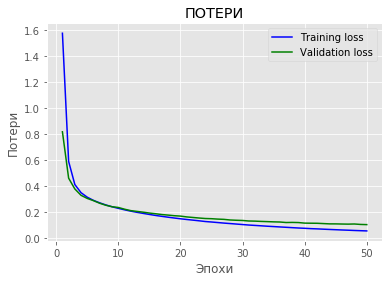

In [11]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline     

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(loss)+1)

plt.plot(epochs,loss,'b', label='Training loss')
plt.plot(epochs,val_loss,'g', label='Validation loss')
plt.title('ПОТЕРИ')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.show()

Эксперименты со своими цифорками

In [17]:
b=0
for i in range(0, 10):
    image = Image.open(str(i) + '.png')
    im = np.array(image)
    im = im[:, :, 0]
    im = im.flatten()
    im = im.reshape((1, 784))
    im = pd.DataFrame(im)
    im = im.applymap(lambda x: 1 if(abs(x - 255)/255>0) else 0)
    #print(im.values)
    print(str(i)+'.png')
    pr=model.predict(im)
    print(pr)
    #проверка принадлежности элемента к строке
    for pr in pr:  
        print(list(pr).index(max(pr)))
        a=(list(pr).index(max(pr)))
    if (int(a)==i):
        b+=1
print("accuracy_score = "+str(b/10))

0.png
[[9.7414124e-01 7.2705633e-11 2.5808308e-02 1.3462538e-05 4.1994888e-09
  6.7718433e-06 1.4659740e-06 1.4029464e-06 2.4283590e-06 2.4906767e-05]]
0
1.png
[[4.83851501e-08 9.98785198e-01 6.81148958e-04 3.38767240e-05
  1.32288815e-05 6.14834698e-06 1.71947686e-04 1.93397529e-04
  1.14361210e-04 7.33546813e-07]]
1
2.png
[[5.4427064e-11 7.3128126e-10 9.9997854e-01 2.0250856e-05 2.6199701e-15
  2.2633432e-14 1.4920546e-14 6.9121059e-12 1.2482564e-06 2.8056892e-13]]
2
3.png
[[4.2427156e-11 6.1165126e-09 4.0744667e-06 9.9999583e-01 2.0384627e-15
  2.0273417e-08 3.9396878e-14 5.3749030e-13 8.0659511e-08 2.9631261e-10]]
3
4.png
[[3.4877917e-08 1.4630118e-10 9.2476178e-09 2.7636460e-09 9.9768484e-01
  3.4399823e-06 3.3180996e-07 1.2988667e-04 1.0000495e-07 2.1813468e-03]]
4
5.png
[[3.4683669e-07 4.0002361e-09 8.0818208e-10 1.9870371e-05 3.7150272e-10
  9.9992156e-01 1.4866885e-07 9.2280463e-12 8.5077490e-06 4.9554394e-05]]
5
6.png
[[3.0109563e-03 2.6516429e-09 2.2186507e-03 1.9756341e-08 